# Reconhecimento de Movimentos Utilizando uma Rede Feedforward (FNN)

In [1]:
import pandas as pd

labels = pd.read_csv("../Dataset/UCI HAR Dataset/UCI HAR Dataset/activity_labels.txt", sep="\s+", header=None)

labels

,0,1
0,1,WALKING
1,2,WALKING_UPSTAIRS
2,3,WALKING_DOWNSTAIRS
3,4,SITTING
4,5,STANDING
5,6,LAYING


## Preparação dos *Datasets*

In [2]:
# Carregar os datasets
X_train = pd.read_csv("../Dataset/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt", header=None, sep="\s+")
y_train = pd.read_csv("../Dataset/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt", header=None)

X_test_val = pd.read_csv("../Dataset/UCI HAR Dataset/UCI HAR Dataset/test/X_test.txt", sep="\s+", header=None)
y_test_val = pd.read_csv("../Dataset/UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt", header=None)

X_test = X_test_val[0:round(0.9*X_test_val.shape[0])]
X_val = X_test_val[round(0.9*X_test_val.shape[0]):]
y_test = y_test_val[0:round(0.9*y_test_val.shape[0])]
y_val = y_test_val[round(0.9*y_test_val.shape[0]):]

X_train.shape, y_train.shape

((7352, 561), (7352, 1))

## Criar o Modelo

In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.optimizers import *
import keras

# Criação do objeto do Modelo
modelo = Sequential()
modelo.add(Dense(113, activation="relu"))
modelo.add(Dense(421, activation="sigmoid"))
modelo.add(Dense(7, activation="softmax"))

modelo.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy', 'precision', 'recall', 'f1_score'])

y_treino_cat = to_categorical(y_train)
y_teste_cat = to_categorical(y_test)
y_val_cat = to_categorical(y_val)

historico = modelo.fit(X_train, y_treino_cat, epochs=20, batch_size=10, validation_data=(X_val, y_val_cat))

Epoch 1/20
736/736 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6735 - f1_score: 0.5730 - loss: 0.1982 - precision: 0.7587 - recall: 0.5666 - val_accuracy: 0.9695 - val_f1_score: 0.8333 - val_loss: 0.0324 - val_precision: 0.9695 - val_recall: 0.9695
Epoch 2/20
736/736 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9408 - f1_score: 0.8075 - loss: 0.0439 - precision: 0.9410 - recall: 0.9407 - val_accuracy: 0.9763 - val_f1_score: 0.8333 - val_loss: 0.0224 - val_precision: 0.9763 - val_recall: 0.9763
Epoch 3/20
736/736 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9593 - f1_score: 0.8233 - loss: 0.0293 - precision: 0.9594 - recall: 0.9592 - val_accuracy: 0.9898 - val_f1_score: 0.8465 - val_loss: 0.0085 - val_precision: 0.9898 - val_recall: 0.9898
Epoch 4/20
736/736 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9681 - f1_score: 0.8306 - loss: 0.0243 - precision: 0.9682 - recall: 0.9679 - val_accuracy: 0.9898 - val_f1_score: 0.8465 - val_loss: 0.0102 - val_precision: 0.9898 - val_recall

## Avaliação da Precisão do Modelo

In [6]:
_, precisao, precision, recall, f1_score  = modelo.evaluate(X_test, y_teste_cat)
print(f"Precisão do Modelo: {precisao*100} %")
print(f"Precision do Modelo: {precision*100} %")
print(f"Recall do Modelo: {recall*100} %")
print(f"F1-Score do Modelo: {f1_score[-1]*100} %")

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9395 - f1_score: 0.7896 - loss: 0.0549 - precision: 0.9400 - recall: 0.9395
Precisão do Modelo: 94.57013607025146 %
Precision do Modelo: 94.60580945014954 %
Recall do Modelo: 94.57013607025146 %
F1-Score do Modelo: 100.0 %


## Evolução da Precisão ao Longo do Treino

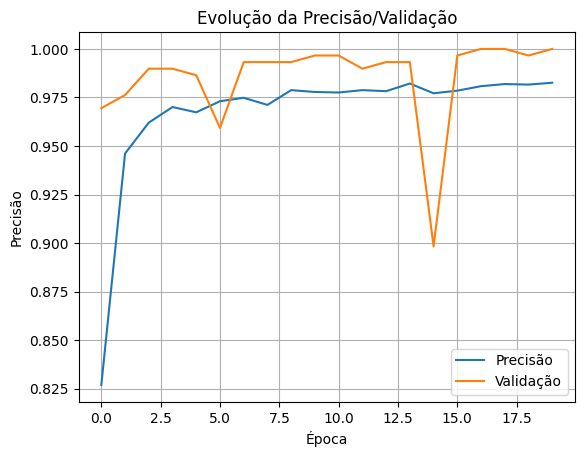

In [11]:
import matplotlib.pyplot as plt

plt.plot(historico.history["accuracy"])
plt.plot(historico.history["val_accuracy"])
plt.title("Evolução da Precisão/Validação")
plt.ylabel("Precisão")
plt.xlabel("Época")
plt.legend(["Precisão", "Validação"])
plt.grid()

## Matriz de Confusão

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


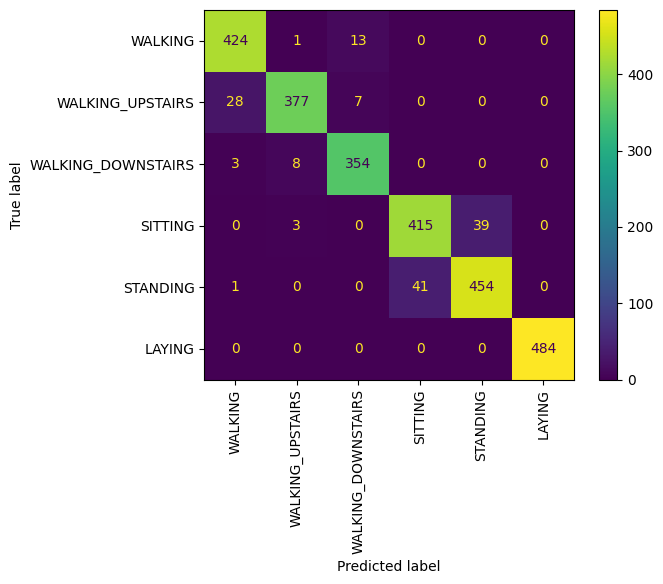

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Saídas previstas
y_previsto = modelo.predict(X_test)
y_previsto = [np.argmax(y) for y in y_previsto]

# Saídas Reais
y_real = [np.argmax(y) for y in y_teste_cat]

# Criação da matriz de confusão
cm = confusion_matrix(y_real, y_previsto)
display = ConfusionMatrixDisplay(cm, display_labels=labels[1])

# Mostrar a matriz de confusão
display.plot(xticks_rotation="vertical")